In [1]:
from analysis import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from scipy.interpolate import make_interp_spline
import seaborn as sns
from matplotlib import rc

In [16]:
rc('text', usetex=True)
rc('font', family='sans-serif')

In [31]:
eps_set = [[0.05, 241], [0.1143, 199], [0.1786, 159], [0.2429, 123], 
           [0.3071, 89], [0.3714, 66], [0.4357, 58], [0.5, 58]]# np.array([[0.05, 80], [0.1143, 56], [0.1786, 41], 
                   # [0.2429, 32], [0.3071, 29], [0.3714, 25], [0.4357, 24], [0.5, 24]])
eps_thresh = [j for (i,j) in eps_set]
data_path = "arm3_eps_v2/data"
files = get_files_in_directory(data_path)
N = len(files)

In [32]:
pop_acc = []; ids = []; exp_len = []
for f in files:
    pid, df, acc, length = load(f, eps_thresh, True)
    exp_len.append(length)
    ids.append(pid); pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
exp_len = np.array(exp_len)/60
print(pop_mean_acc)
print(N)

60f275aeeae99d547a89f5b8,1.0
611d05c997db7c2653864ff4,1.48
60b7e28349c6c6d290dc8075,1.09
6310a2fb7a4dd7e9a7e72dea,1.23
5ece064a75736a193990951a,1.53
60832513ad492f85d73a0574,1.32
5f632ea32e85353d93872c67,1.07
60194185dc1e1f00083cb6c6,1.57
60ffd7de4dc3ea2bfd477a22,1.4
5f3d7b3310ad88134a27f2c7,1.67
5f3d718e8de6ae12265b95ae,1.16
5cd1bdedf2156c00013b0152,1.37
5ec3f25d9cedf7287004cd26,1.03
61648e4f0d2212047ab36b27,1.64
606c6e9f7e86c0264ab3d7d8,1.51
64528908f63d6e6beb01b877,1.39
0.655132075471698
53


6126be630953fe354ba4f78f
60f275aeeae99d547a89f5b8
5fc8088906bd7a10c6eced41
6148fd675993224dc86016d3
611d05c997db7c2653864ff4
60b7e28349c6c6d290dc8075
60d1004080fadfada90afbe6
6151fc337e8e6c69ea53efd8
61541ab0876a2758ac6dc72f
6310a2fb7a4dd7e9a7e72dea
5f466020c3a053038da47399
61768384731ac05202ee94a9
5ece064a75736a193990951a
6130c63cbc2019e204794c5b
60832513ad492f85d73a0574
6116b0c58bb19949da9ef584
60d4fbe3187fe07b082fdb6d
616712249f8a8f034766cd47
615a0c65241737f2dece4771
60cf8cd5edc8abe7af47f138
5f632ea32e85353d93872c67
60194185dc1e1f00083cb6c6
5caf451e7692490017d22482
5f3d7b3310ad88134a27f2c7
60a2bf8caed2e8c3b108588b
613615da1eacf6204ce33479
611d3cadcee021ae2fa85df3
615096da057ab02942bea00d
61387f74d9d8365effc1b227
616e239c6264d82a051c5191
61070ae8d3d60051894d043d
60d4613121b754739be92895
5f3d718e8de6ae12265b95ae
5f60ec27ae3437000bc97536
5eda9e891e6ee06df48c4b57
5a2420437413810001521dd6
5e9ce3d90e7d212164143c80
5ec3f25d9cedf7287004cd26
613a9a5a92a1c84fc4e3fd07
61290e83a2d9e168e4392ead


(array([ 2.,  0.,  2.,  5.,  5., 11., 14.,  6.,  5.,  3.]),
 array([0.503 , 0.5288, 0.5546, 0.5804, 0.6062, 0.632 , 0.6578, 0.6836,
        0.7094, 0.7352, 0.761 ]),
 <BarContainer object of 10 artists>)

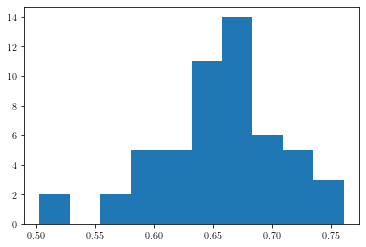

In [44]:
for f in ids:
    if f not in ['60ffd7de4dc3ea2bfd477a22', '5bf890e426e31d0001040667', '5cd1bdedf2156c00013b0152',
                '61648e4f0d2212047ab36b27', '615d50afaa1ddf26457e079c']:
        print(f)
for a in pop_acc:
    print(a)
plt.hist(pop_acc)

27.275813584905663


(array([ 5., 10., 16.,  3.,  9.,  3.,  3.,  3.,  0.,  1.]),
 array([ 7.98398   , 13.69952167, 19.41506333, 25.130605  , 30.84614667,
        36.56168833, 42.27723   , 47.99277167, 53.70831333, 59.423855  ,
        65.13939667]),
 <BarContainer object of 10 artists>)

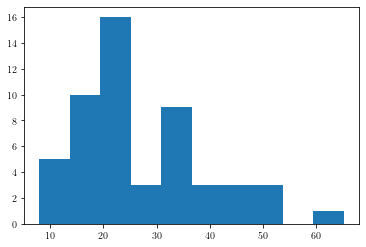

In [35]:

print(np.mean(exp_len))

np.std(exp_len)
plt.hist(exp_len)

# theoretical predictions

In [36]:
path = '../model/sims/'
df_eps = pd.read_csv(path+'eps_simulate_1000_q0.75_2023-07-28.csv')

Text(0.5, 1.0, 'Model predictions for mean commitment time as a function of $\\epsilon$')

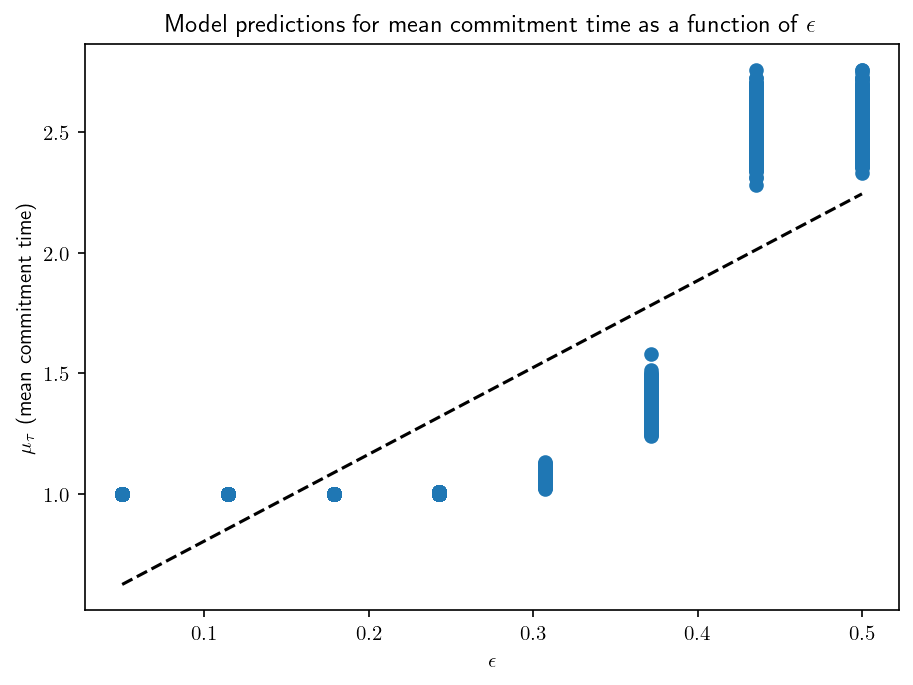

In [37]:
fig, ax = plt.subplots(figsize=(7,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
x,y = np.array(df_eps['eps']).reshape(-1,1), np.array(df_eps['mu_i']).reshape(-1,1)
plt.scatter(x,y)
fit_eps, fit_mu, __, __ = get_linear_fit(x,y)
plt.plot(fit_eps, fit_mu, 'k--')
plt.xlabel('$\epsilon$')
plt.ylabel('$\mu_\\tau$ (mean commitment time)')
plt.title('Model predictions for mean commitment time as a function of $\epsilon$')

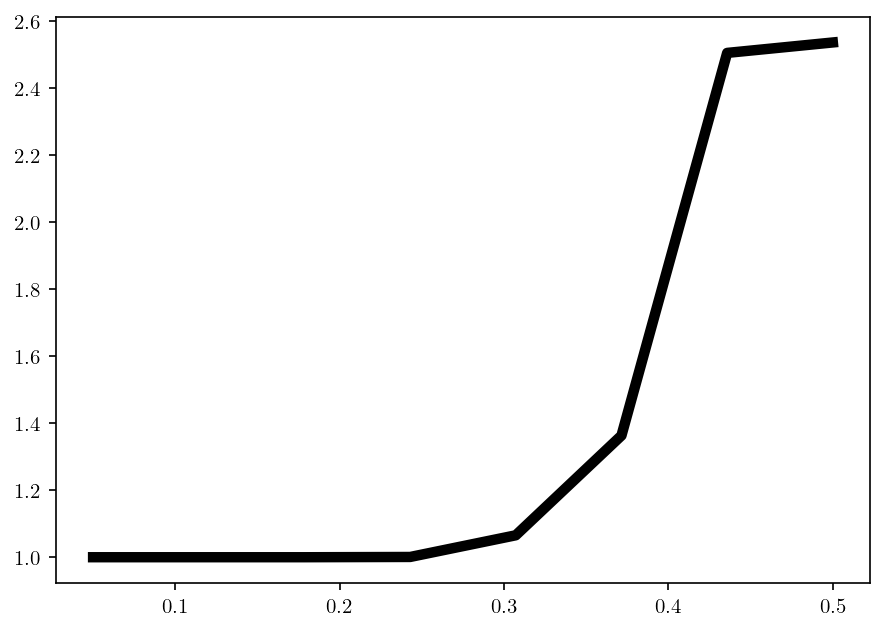

In [38]:
mdl_avg_eps = []
for e in df_eps['eps'].unique():
    eps_level = df_eps[df_eps['eps'] == e]['mu_i']
    mdl_avg_eps.append(np.mean(eps_level))
fig, ax = plt.subplots(figsize=(7,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
plt.plot(df_eps['eps'].unique(), mdl_avg_eps, c='black', linewidth=5)

# comparison before and after discarding first 70 trials

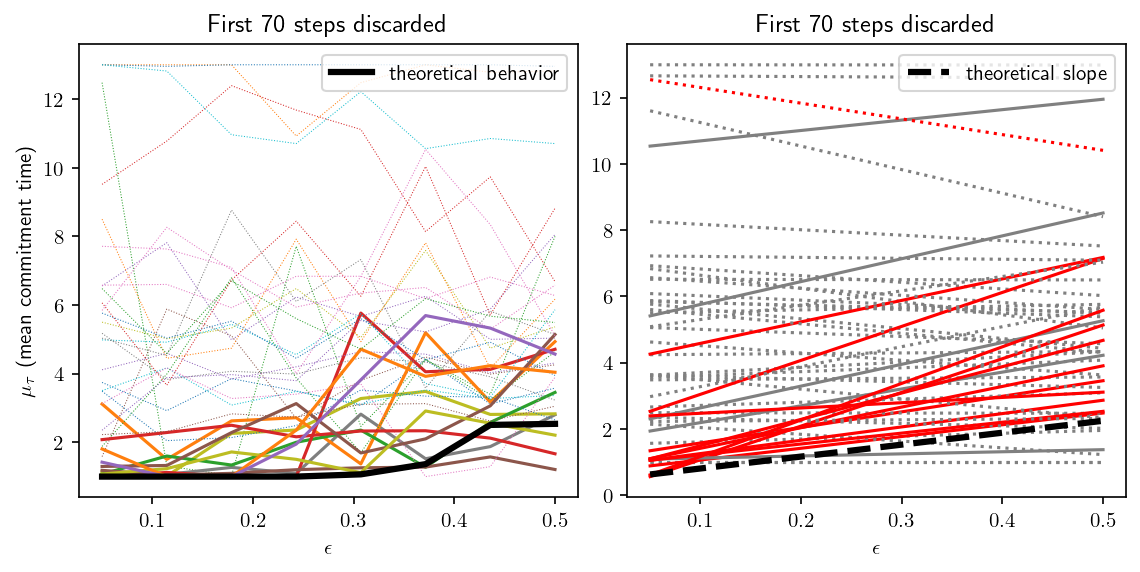

In [41]:
fig, ax = plt.subplots(figsize=(9,4),dpi=150)
plt.subplots_adjust(wspace=0.1)
plt.subplot(122)
pop_acc = []
discard = 70
for f in files:
    pid, df, acc, length = load(f, eps_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
for f in files:
    pid, df, acc, length = load(f, eps_thresh)
    if np.abs(acc - pop_mean_acc) < 2*np.std(pop_acc):
        __, eps, mu_i, __ = get_mean_iai(df, discard)
        x,y,l,c = get_linear_fit(eps,mu_i)
#         plt.scatter(np.linspace(1,8,8),mu_i)
        plt.plot(x,y, linestyle = l, c=c)
plt.xlabel('$\epsilon$')
plt.plot(fit_eps, fit_mu, 'k--', linewidth = 3, label = "theoretical slope")
plt.title("First 70 steps discarded")
plt.legend()


plt.subplot(121)
discard = 70
pop_acc = []
for f in files:
    pid, df, acc, length = load(f, eps_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
for f in files:
    pid, df, acc, length = load(f, eps_thresh)
    if np.abs(acc - pop_mean_acc) < np.std(pop_acc):
        __, eps, mu_i, __ = get_mean_iai(df, discard)
        xy = np.concatenate((eps[:,0].reshape(-1,1), mu_i[:,0].reshape(-1,1)), axis=1)
        xy = pd.DataFrame(xy, columns = ["x", "y"])
        xy = xy.sort_values('x')
        if compute_bonus(df, eps_thresh) == 0:
            plt.plot(np.array(xy["x"]), np.array(xy["y"]), linestyle = 'dotted', linewidth=0.5)
        else:
            plt.plot(np.array(xy["x"]), np.array(xy["y"]))
        x,y,l,c = get_linear_fit(eps,mu_i)
plt.plot(df_eps['eps'].unique(), mdl_avg_eps, c='black', linewidth=3, label = 'theoretical behavior')
plt.xlabel('$\epsilon$')
plt.title("First 70 steps discarded")
plt.ylabel('$\mu_\\tau$ (mean commitment time)')
plt.legend()

Text(0.5, 1.0, 'First 70 steps discarded')

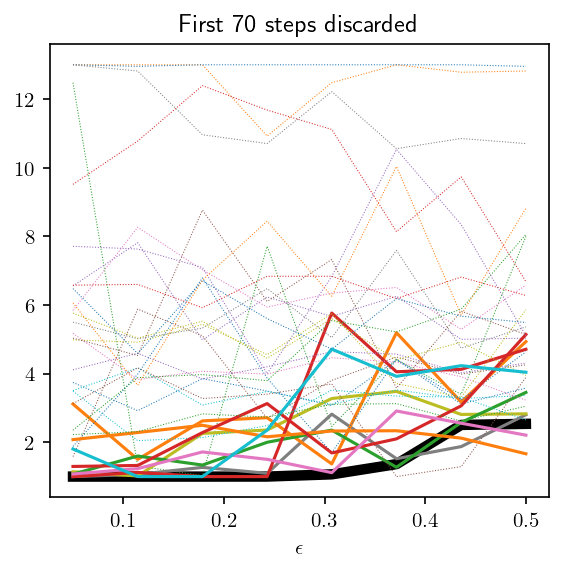

In [13]:
fig, ax = plt.subplots(figsize=(9,4),dpi=150)
plt.subplots_adjust(wspace=0.1)
# plt.subplot(121)
# plt.plot(df_eps['eps'].unique(), mdl_avg_eps, c='black', linewidth=5, label = 'theoretical behavior')
# pop_acc = []
# for f in files:
#     pid, df, acc, length = load(f, eps_thresh)
#     pop_acc.append(acc)
# pop_mean_acc = np.mean(pop_acc)
# for f in files:
#     pid, df, acc, length = load(f, eps_thresh)
#     if np.abs(acc - pop_mean_acc) < 1.25*np.std(pop_acc):
#         __, eps, mu_i, __ = get_mean_iai(df)
#         xy = np.concatenate((eps[:,0].reshape(-1,1), mu_i[:,0].reshape(-1,1)), axis=1)
#         xy = pd.DataFrame(xy, columns = ["x", "y"])
#         xy = xy.sort_values('x')
#         if compute_bonus(df, eps_thresh) == 0:
#             plt.plot(np.array(xy["x"]), np.array(xy["y"]), linestyle = 'dotted', linewidth=0.5, label = 'subject accuracy: ' + str(acc))
#         else:
#             plt.plot(np.array(xy["x"]), np.array(xy["y"]), label = 'subject accuracy: ' + str(acc))
#         x,y,l,c = get_linear_fit(eps,mu_i)
# plt.xlabel('$\epsilon$')
# plt.ylabel('$\mu_\\tau$ (mean commitment time)')
# # plt.legend()


plt.subplot(122)
discard = 70
pop_acc = []
plt.plot(df_eps['eps'].unique(), mdl_avg_eps, c='black', linewidth=5, label = 'theoretical behavior')
for f in files:
    pid, df, acc, length = load(f, eps_thresh)
    pop_acc.append(acc)
pop_mean_acc = np.mean(pop_acc)
for f in files:
    pid, df, acc, length = load(f, eps_thresh)
    if np.abs(acc - pop_mean_acc) < np.std(pop_acc):
        __, eps, mu_i, __ = get_mean_iai(df, discard)
        xy = np.concatenate((eps[:,0].reshape(-1,1), mu_i[:,0].reshape(-1,1)), axis=1)
        xy = pd.DataFrame(xy, columns = ["x", "y"])
        xy = xy.sort_values('x')
        if compute_bonus(df, eps_thresh) == 0:
            plt.plot(np.array(xy["x"]), np.array(xy["y"]), linestyle = 'dotted', linewidth=0.5, label = 'bonus: ' + str(compute_bonus(df,eps_thresh)))
        else:
            plt.plot(np.array(xy["x"]), np.array(xy["y"]), label = 'bonus: ' + str(compute_bonus(df,eps_thresh)))
        x,y,l,c = get_linear_fit(eps,mu_i)
plt.xlabel('$\epsilon$')
plt.title("First 70 steps discarded")
# plt.legend()

Text(0.5, 1.0, 'Accuracy across blocks for arm3\\_eps')

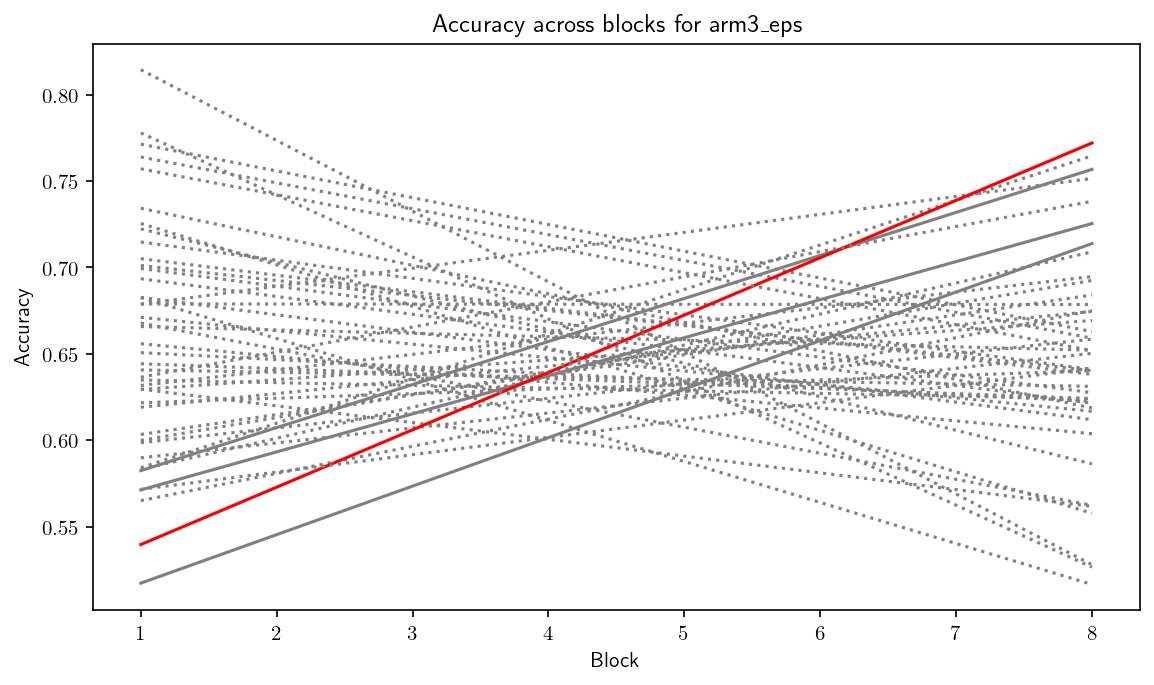

In [45]:
fig, ax = plt.subplots(figsize=(9,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
for f in files:
    pid, df, acc, length = load(f, eps_thresh)
    if np.abs(acc - pop_mean_acc) < 1.25*np.std(pop_acc):
        __, eps, acc_i = get_accuracy(df)
        rounds = np.linspace(1,8,8).reshape(-1,1)
        x,y,l,c = get_linear_fit(rounds,acc_i)
        plt.plot(x,y, linestyle = l, c=c)
plt.xlabel('Block')
plt.ylabel('Accuracy')
plt.title('Accuracy across blocks for arm3\_eps')
# plt.plot(fit_q, fit_mu, 'k--')

Text(0.5, 1.0, 'Accuracy across blocks for arm3\\_q')

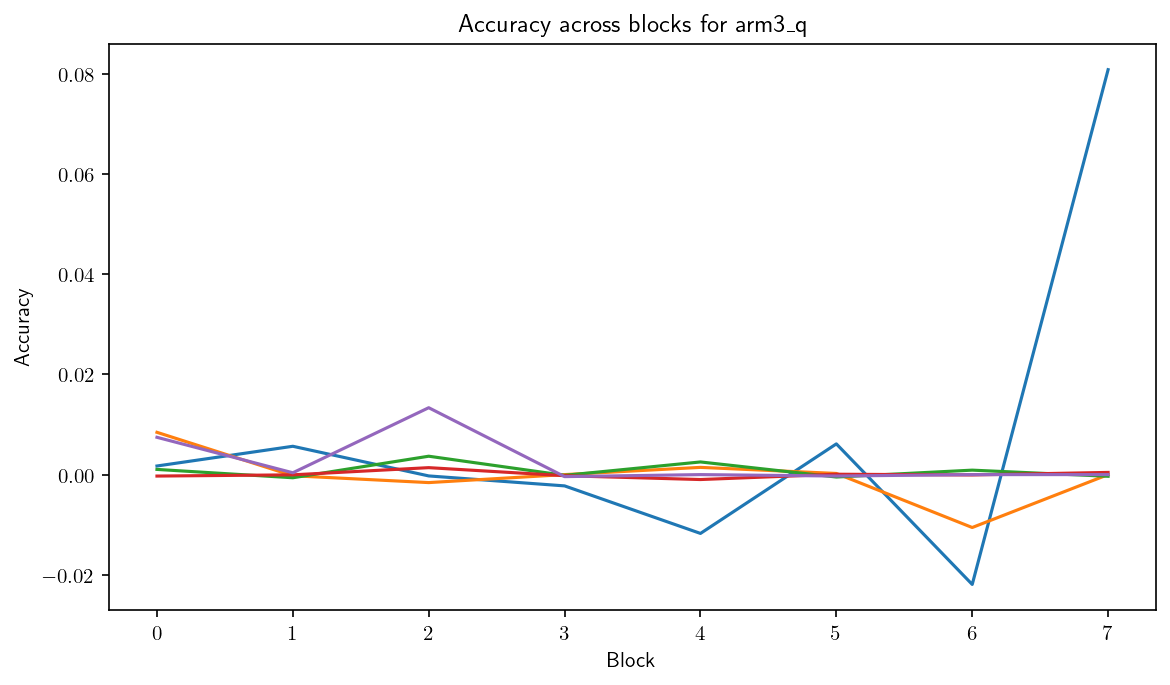

In [14]:
fig, ax = plt.subplots(figsize=(9,5),dpi=150)
plt.subplots_adjust(wspace=0.2)
belief = []
for f in files:
    pid, df, acc, length = load(f, eps_thresh)
    q, eps, thr = get_abs_threshold(df)
    belief.append(thr)
    plt.plot(thr)
#     plt.plot(down_price)
plt.xlabel('Block')
plt.ylabel('Accuracy')
plt.title('Accuracy across blocks for arm3\_q')
# plt.plot(fit_q, fit_mu, 'k--')

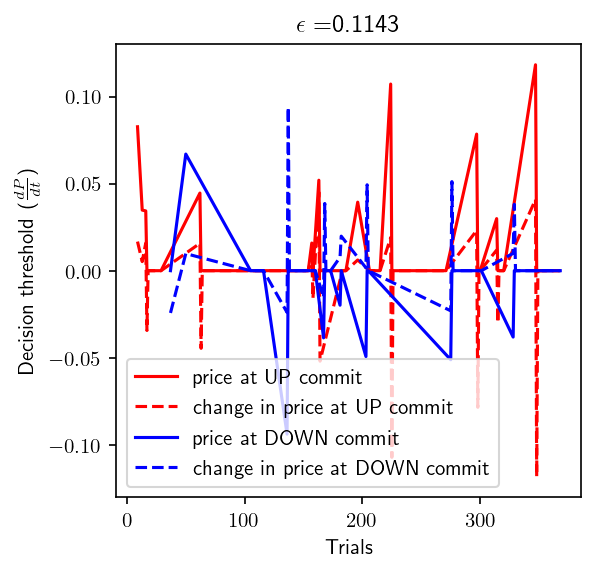

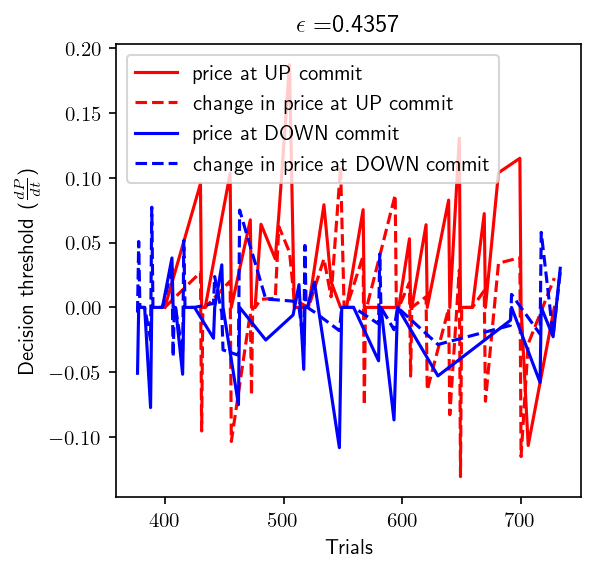

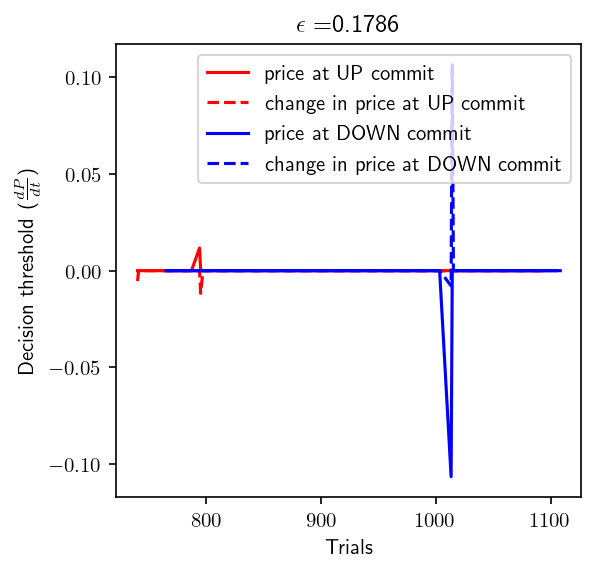

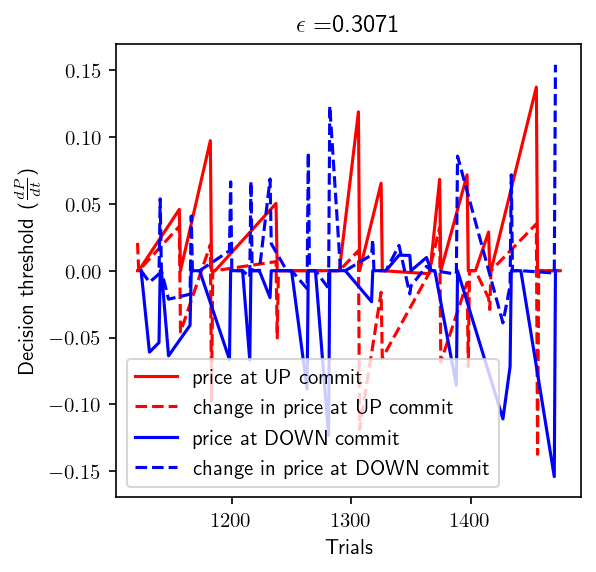

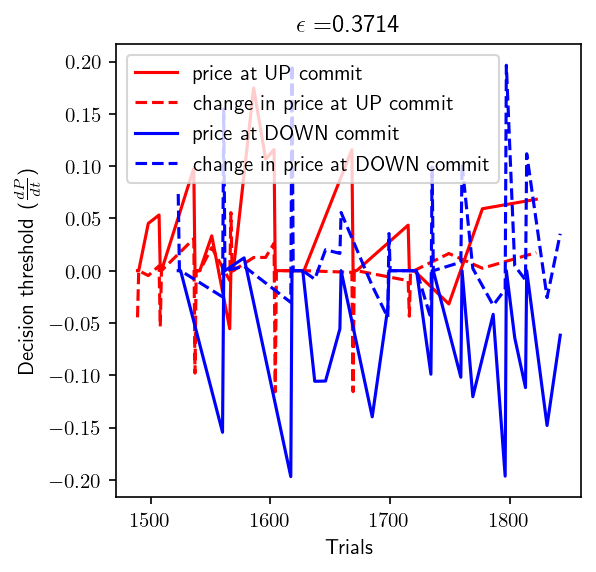

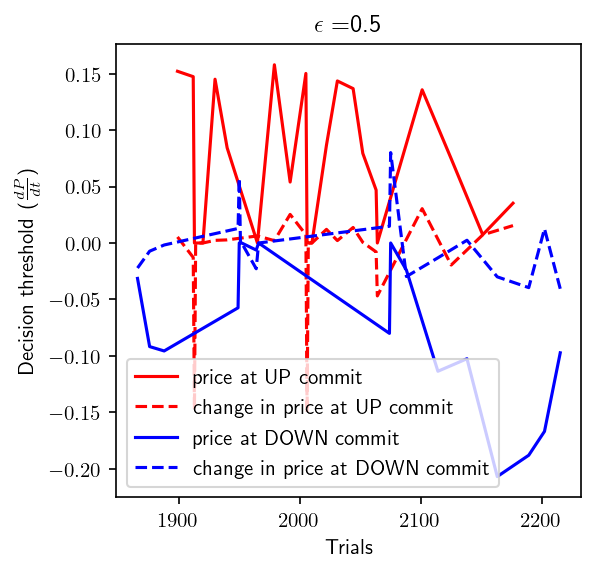

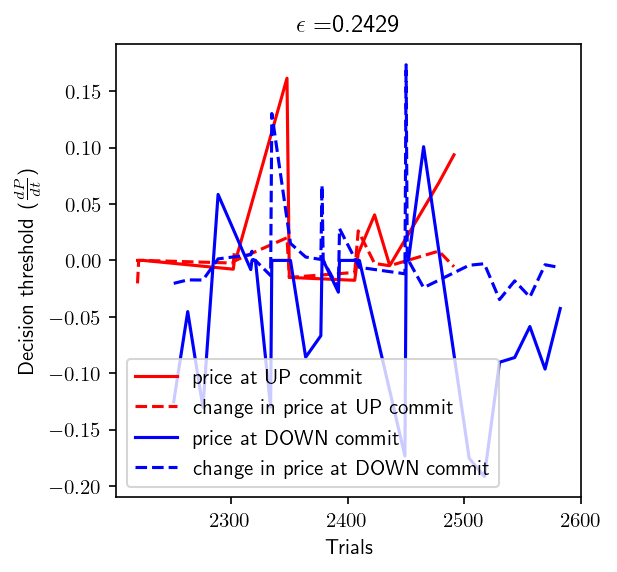

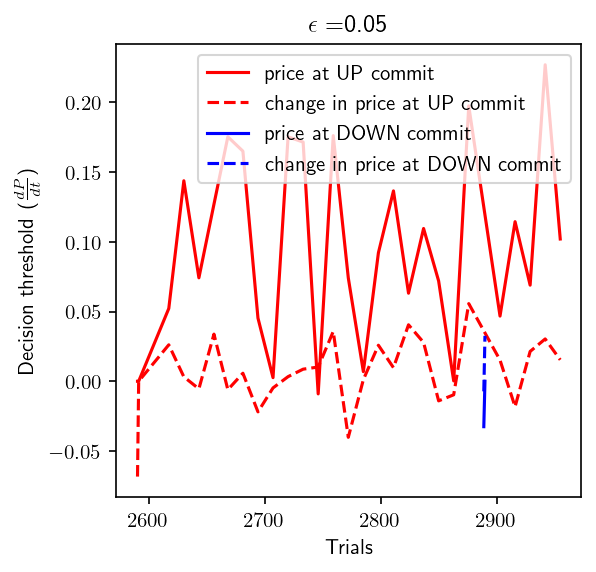

In [14]:
for i in range(1,numBlocks+1):
    fig, ax = plt.subplots(figsize=(4,4),dpi=150)
    curBlock = block(i,df, 0)
    ups = curBlock.index[curBlock['resp.keys'] == 1]
    ups = ups - 1
    ups = ups[1:]
    downs = curBlock.index[curBlock['resp.keys'] == -1]
    downs = downs - 1
    downs = downs[1:]
    both = curBlock.index[np.abs(curBlock['resp.keys']) == 1]
    both = both - 1
    both = both[1:]
    plt.plot(df.iloc[ups]['price'], 'r', label = 'price at UP commit')
    plt.plot(df.iloc[ups]['dPrice_dt'], 'r--', label = 'change in price at UP commit')
    plt.plot(df.iloc[downs]['price'], 'b', label = 'price at DOWN commit')
    plt.plot(df.iloc[downs]['dPrice_dt'], 'b--', label = 'change in price at DOWN commit')
    plt.xlabel('Trials')
    plt.ylabel('Decision threshold ($\\frac{dP}{dt}$)')
    plt.title('$\epsilon = $' + str(curBlock['eps_prob'].iloc[0]))
    plt.legend()
    plt.show()

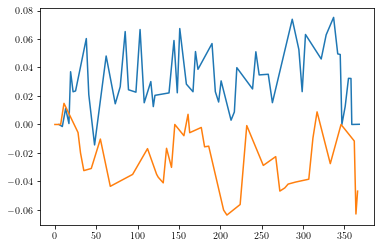

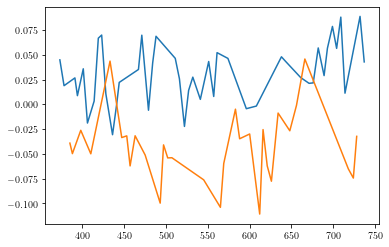

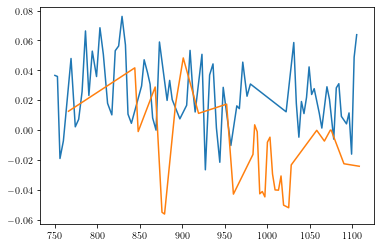

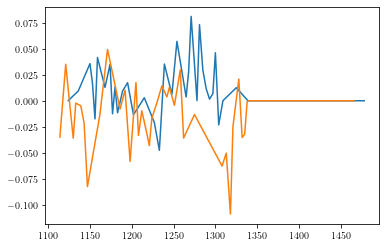

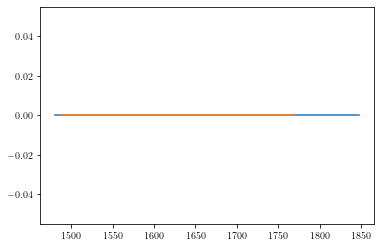

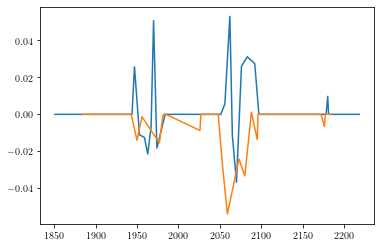

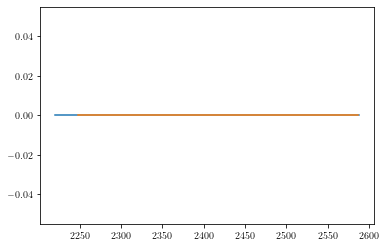

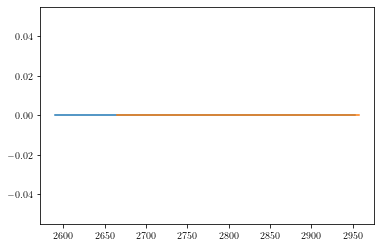

In [38]:
for i in range(1,numBlocks+1):
    curBlock = block(i,df, 0)
    ups = curBlock.index[curBlock['resp.keys'] == 1]
    ups = ups - 1
    ups = ups[1:]
    downs = curBlock.index[curBlock['resp.keys'] == -1]
    downs = downs - 1
    downs = downs[1:]
    plt.plot(df.iloc[ups]['price'])
    plt.plot(df.iloc[downs]['price'])
    plt.show()

In [40]:
np.sum(df['resp.rt'])

418.7741